# ELIZABETH
#### URL and API Call

In [1]:
# Dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Census API Key
from api_keys import census_api_key

# API Key + States to call
API_KEY = census_api_key
state = 'state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56'

# URL
employment_2022_url = f'https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2021_url = f'https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2019_url = f'https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2018_url = f'https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'
employment_2017_url = f'https://api.census.gov/data/2017/acs/acs1?get=NAME,group(B23025)&for={state}&key={census_api_key}'

## JSON Requests and Employment DataFrames

In [2]:
# json get request
employment_2022_json = requests.get(employment_2022_url).json()
employment_2021_json = requests.get(employment_2021_url).json()
employment_2019_json = requests.get(employment_2019_url).json()
employment_2018_json = requests.get(employment_2018_url).json()
employment_2017_json = requests.get(employment_2017_url).json()


# create employment dataframe
employment_2022_df = pd.DataFrame(requests.get(employment_2022_url).json()[1:], columns=requests.get(employment_2022_url).json()[0])
employment_2021_df = pd.DataFrame(requests.get(employment_2021_url).json()[1:], columns=requests.get(employment_2021_url).json()[0])
employment_2019_df = pd.DataFrame(requests.get(employment_2019_url).json()[1:], columns=requests.get(employment_2019_url).json()[0])
employment_2018_df = pd.DataFrame(requests.get(employment_2018_url).json()[1:], columns=requests.get(employment_2018_url).json()[0])
employment_2017_df = pd.DataFrame(requests.get(employment_2017_url).json()[1:], columns=requests.get(employment_2017_url).json()[0])


# rename group code columns with descriptions
employment_2022_df_cleaned = employment_2022_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2021_df_cleaned = employment_2021_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2019_df_cleaned = employment_2019_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2018_df_cleaned = employment_2018_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})
employment_2017_df_cleaned = employment_2017_df.rename(columns={
    'B23025_002E': 'Total in Labor Force',
    'B23025_005E': 'Total Unemployed in Civilian Labor Force',
    'NAME': 'State'
})


# add year column
employment_2022_df_cleaned['Year'] = 2022
employment_2021_df_cleaned['Year'] = 2021
employment_2019_df_cleaned['Year'] = 2019
employment_2018_df_cleaned['Year'] = 2018
employment_2017_df_cleaned['Year'] = 2017


# extract specific columns for final dataframe
employment_2022_df_final = employment_2022_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2021_df_final = employment_2021_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2019_df_final = employment_2019_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2018_df_final = employment_2018_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]
employment_2017_df_final = employment_2017_df_cleaned[[
    'Year',
    'State',
    'Total in Labor Force',
    'Total Unemployed in Civilian Labor Force'
]]

# remove duplicate NAME columns
employment_2022_df_final = employment_2022_df_final.loc[:, ~employment_2022_df_final.columns.duplicated()]
employment_2021_df_final = employment_2021_df_final.loc[:, ~employment_2021_df_final.columns.duplicated()]
employment_2019_df_final = employment_2019_df_final.loc[:, ~employment_2019_df_final.columns.duplicated()]
employment_2018_df_final = employment_2018_df_final.loc[:, ~employment_2018_df_final.columns.duplicated()]
employment_2017_df_final = employment_2017_df_final.loc[:, ~employment_2017_df_final.columns.duplicated()]


# combine dataframes
combined_employment_df = pd.concat([employment_2022_df_final, 
                                   employment_2021_df_final, 
                                   employment_2019_df_final, 
                                   employment_2018_df_final, 
                                   employment_2017_df_final], 
                                  axis=0)


# reset index column to not repeat individual df index aka 0-50 would be shown 5 times vs now reset and we see unique index 0-254
combined_employment_df.reset_index(drop=True, inplace=True)

# # csv output
# combined_employment_df.to_csv('Data/combined_employment_data.csv')

# table output
combined_employment_df


,Year,State,Total in Labor Force,Total Unemployed in Civilian Labor Force
0,2022,Alabama,2398213,103239
1,2022,Alaska,386093,16484
2,2022,Arizona,3619698,153937
3,2022,Arkansas,1404190,62359
4,2022,California,20174168,1060822
...,...,...,...,...
250,2017,Maine,702420,29493
251,2017,Maryland,3294443,170419
252,2017,Massachusetts,3776331,172091
253,2017,Michigan,4949724,291020


## Merge CSV Data to create a final DataFrame used to create visuals

In [3]:
# Import Dependencies
# from pathlib import Path

# Files to Load
opioid_deaths_to_load = Path('Data/opioid_death_counts.csv')
employment_data_to_load = Path('Data/combined_employment_data.csv')

# # Read Drug Overdose Data File and store into Pandas DataFrames
opioid_csv = pd.read_csv(opioid_deaths_to_load, index_col = 0)
employment_csv = pd.read_csv(employment_data_to_load, index_col = 0)

# merge csv files
employment_vs_opioid_df = pd.merge(employment_csv, opioid_csv, on=['State', 'Year'], how='left')

# pivot dataframe and aggregate
pivot_df = employment_vs_opioid_df.pivot_table(
    index = 'State',
    values = ['Total Unemployed in Civilian Labor Force', 'Total Opioid Deaths'],
    aggfunc = 'sum'
).reset_index()

# calculate % contributions for each state
pivot_df['Unemployment Contribution'] = (pivot_df['Total Unemployed in Civilian Labor Force'] / pivot_df['Total Unemployed in Civilian Labor Force'].sum())  * 100
pivot_df['Opioid Death Contribution'] = (pivot_df['Total Opioid Deaths'] / pivot_df['Total Opioid Deaths'].sum()) * 100

# calculate ratio
pivot_df['Contribution Ratio'] = pivot_df['Opioid Death Contribution'] / pivot_df['Unemployment Contribution']

# contribution table for 
contribution_df = pivot_df[[
    'State',
    'Contribution Ratio',
    'Unemployment Contribution',
    'Opioid Death Contribution'
]]

contribution_df.head()

,State,Contribution Ratio,Unemployment Contribution,Opioid Death Contribution
0,Alabama,0.295025,1.407103,0.415131
1,Alaska,0.889483,0.274413,0.244086
2,Arizona,1.342573,2.161369,2.901795
3,Arkansas,0.361586,0.821128,0.296908
4,California,0.504184,14.301555,7.210613


# Heatmap of Contribution Ratio


Contribution Ratio Indicators:

Ratio > 1: Indicates that opioid deaths are disproportionately higher relative to unemployment in that state.
Ratio = 1: Indicates a balance between contributions to unemployment and opioid deaths.
Ratio < 1: Indicates that suggesting that opioid deaths are disproportionately lower relative to unemployment in that state.



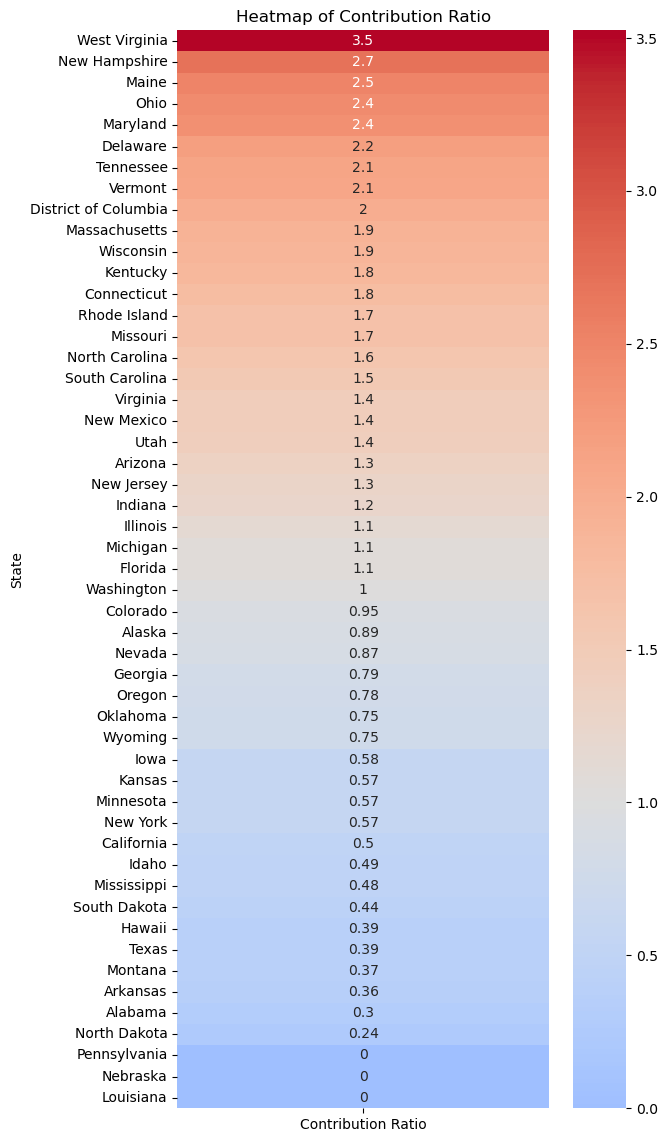

In [4]:
# sort for heatmap to be greatest to smallest
sorted_pivot_df = pivot_df.sort_values('Contribution Ratio', ascending=False)

# set up heatmap
plt.figure(figsize=(6, 14))
sns.heatmap(sorted_pivot_df.set_index('State')[['Contribution Ratio']], annot=True, cmap='coolwarm', center=1)
plt.title('Heatmap of Contribution Ratio')

# print indication notes and show output
print("\n\033[4mContribution Ratio Indicators\033[0m:\n")
print("Ratio > 1: Indicates that opioid deaths are disproportionately higher relative to unemployment in that state.")
print("Ratio = 1: Indicates a balance between contributions to unemployment and opioid deaths.")
print("Ratio < 1: Indicates that suggesting that opioid deaths are disproportionately lower relative to unemployment in that state.\n")
plt.show()

In [5]:
# states with no records
states_to_exclude = ['Louisiana', 'Pennsylvania', 'Nebraska']

# isolate to 2022 and states only with recorded opioid data
filtered_df_2022 = employment_vs_opioid_df[
    (employment_vs_opioid_df['Year'] == 2022) &
    (~employment_vs_opioid_df['State'].isin(states_to_exclude))
] 

# calculated fields and pivot
pivot_df_2022 = filtered_df_2022.pivot_table(
    index = 'State',
    aggfunc = 'first'
).reset_index()
pivot_df_2022['2022 State Percent Unemployed'] = pivot_df_2022['Total Unemployed in Civilian Labor Force'] / pivot_df_2022['Total in Labor Force'] * 100
pivot_df_2022['2022 Opioid Death Contribution Percent'] = (pivot_df_2022['Total Opioid Deaths'] / pivot_df_2022['Total Opioid Deaths'].sum()) * 100
pivot_df_2022['Opioid Death Rank'] = pivot_df_2022['Total Opioid Deaths'].rank(ascending=False)

# set up for formatting
summary_2022 = pivot_df_2022 [[
    'State',
    'Opioid Death Rank',
    '2022 Opioid Death Contribution Percent',
    '2022 State Percent Unemployed'
]]

summary_2022 = summary_2022.fillna(0)
summary_2022['Opioid Death Rank'] = summary_2022['Opioid Death Rank'].rank(method='min').astype(int)
sorted_2022_summary = summary_2022.sort_values('2022 State Percent Unemployed', ascending=False)


# contribution table for 
formatted_2022_summary = sorted_2022_summary.style \
    .format({
        '2022 State Percent Unemployed': '{:.1f}%',
        '2022 Opioid Death Contribution Percent': '{:.1f}%'
    }) \
    .set_properties(**{'text-align': 'center'}) \
    .set_caption("2022 Unemployment Percent and Opioid Death Rank") \
    .hide(axis='index')

# output
formatted_2022_summary


State,Opioid Death Rank,2022 Opioid Death Contribution Percent,2022 State Percent Unemployed
Nevada,29,0.9%,5.4%
California,1,10.5%,5.3%
New York,9,3.6%,5.1%
District of Columbia,36,0.6%,5.0%
New Jersey,8,3.6%,5.0%
Mississippi,32,0.7%,4.8%
Illinois,5,4.4%,4.7%
West Virginia,24,1.6%,4.7%
Connecticut,22,1.9%,4.7%
New Mexico,28,1.0%,4.7%


In [6]:
# formatted_2022_summary.to_html('Images/2022_Unemployment_Percent_Opioid_Death_Rank.html')

# Pie Chart Visual
### % Unemployed + Opioid Deaths by Year(2017-2022)

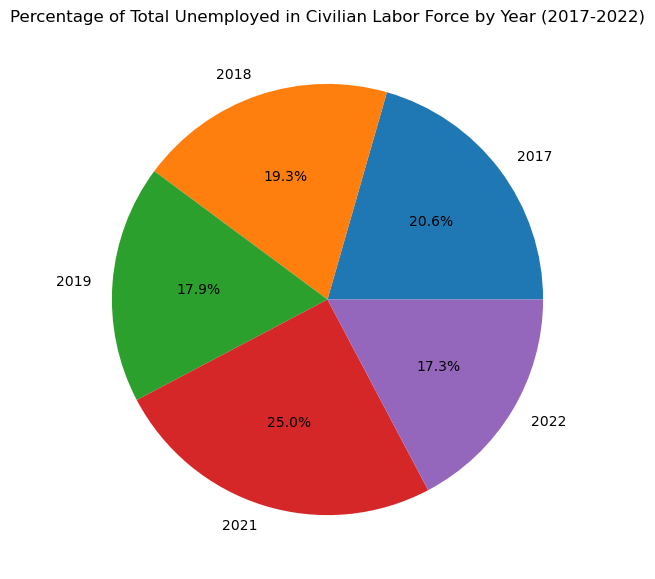

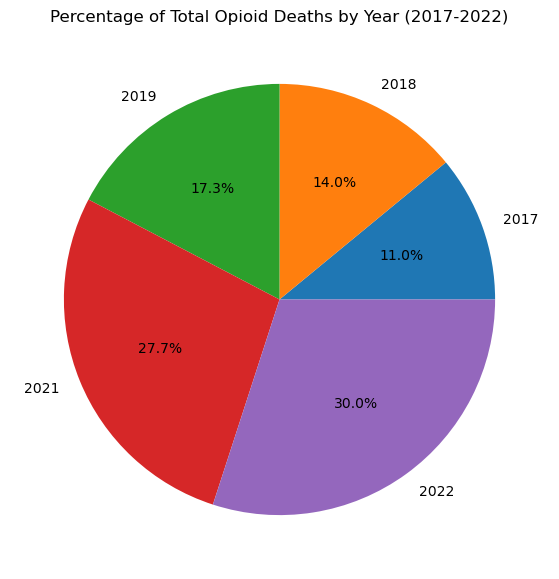

In [7]:
import matplotlib.pyplot as plt

# aggregate data by state
state_aggregated_df = employment_vs_opioid_df.groupby('Year').agg({
    'Total Unemployed in Civilian Labor Force': 'sum',
    'Total Opioid Deaths': 'sum'
}).reset_index()

# unemployed pie chart
plt.figure(figsize=(10,7))
plt.pie(state_aggregated_df['Total Unemployed in Civilian Labor Force'], labels = state_aggregated_df['Year'], autopct='%1.1f%%')
plt.title('Percentage of Total Unemployed in Civilian Labor Force by Year (2017-2022)')
plt.show()

# opioid death pie chart
plt.figure(figsize=(10,7))
plt.pie(state_aggregated_df['Total Opioid Deaths'], labels = state_aggregated_df['Year'], autopct='%1.1f%%')
plt.title('Percentage of Total Opioid Deaths by Year (2017-2022)')
plt.show()

Right now we cannot come to any conclusions to determine if unemployment rate overlaps with the specific opioid deaths. We would be able to make a better judgement if we had the employment status for the indiviual persons part if the death rates from opioids. Its interesting because one might say unemployment has an OPPOSITE impact on opoid deaths, 2022 had the highest unemployment rates and the lowest deaths. Whereas 2017 had the lowest unemployment rates and the second highest death rate. 